In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")

# Type Well

In [3]:
file = "../data/Probabilisticobase.xlsm"
df_pt = pd.read_excel(file, sheet_name="PT", header=3, index_col="# Mes")
df_pt.rename(columns={"Qo(Bbl)": "qo_bbl"}, inplace=True)
df_pt.head(3)

,qo_bbl
# Mes,
0.0,0.000000
1.0,408.200000
2.0,355.925601


In [4]:
df_pt.describe()

,qo_bbl
count,318.000000
mean,41.453279
std,53.363289
min,0.000000
25%,11.838019
50%,23.667228
75%,47.346988
max,408.200000


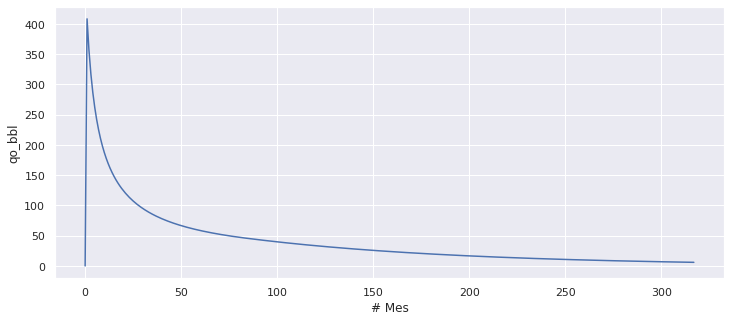

In [5]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_pt.qo_bbl)
plt.show()

## Apply multiplier to qo_type_well

In [6]:
pt_mult = [1, 0.85, 1.25]

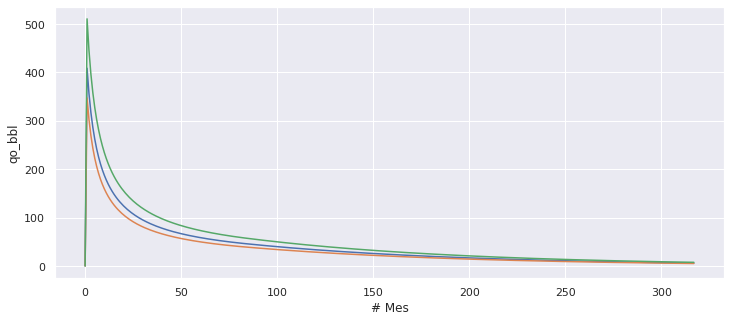

In [7]:
plt.figure(figsize=(12, 5))
for pt in pt_mult:
    sns.lineplot(x=df_pt.index, y=df_pt.qo_bbl.map(lambda x: x * pt))
    ax = plt.gca()
    # ax.legend(labels = pt)  # TODO

## Change tie_in month

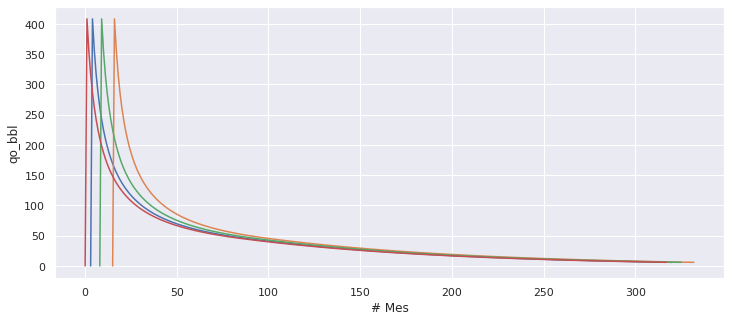

In [8]:
pt_time_disp = [3, 15, 8, 0]
plt.figure(figsize=(12, 5))
# ffd_df = pd.
for tie_in in pt_time_disp:
    sns.lineplot(x=df_pt.index.map(lambda x: x + tie_in), y=df_pt.qo_bbl)
    ax = plt.gca()

### Single Well

In [9]:
month_tie_in = 3
displaced_df = df_pt.copy(deep=True)

displaced_df.index = displaced_df.index.map(lambda x: x + month_tie_in)
displaced_df.head(3)
# displaced_df.head(7)

,qo_bbl
# Mes,
3.0,0.000000
4.0,408.200000
5.0,355.925601


In [10]:
df_pt.join(displaced_df.qo_bbl, how="outer", rsuffix="late_tie_in")

,qo_bbl,qo_bbllate_tie_in
# Mes,,
0.0,0.000000,NaN
1.0,408.200000,NaN
2.0,355.925601,NaN
3.0,316.855767,NaN
3.0,NaN,0.000000
...,...,...
316.0,6.025616,6.185727
317.0,5.973172,6.131889
318.0,NaN,6.078520


### Multiwell

In [11]:
num_wells = 30  # 30 Wells for excercise
max_months_tie_in = 12 * 8  # 8 Years of development

wells = [f"well-{i}" for i in range(num_wells)]
tie_in_diff = np.random.randint(
    0, max_months_tie_in, num_wells
)  # Test uniform distribution for well tie-in.

assert len(wells) == len(tie_in_diff), "Well number and tie_in_diff sizes do not match"

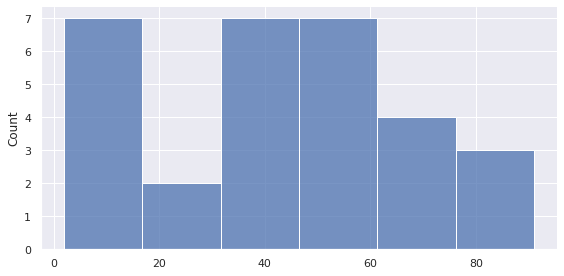

In [60]:
sns.displot(tie_in_diff, height=4, aspect=2, kind='hist')

plt.show()

In [34]:
ffd_df = pd.DataFrame(index=(range(int(max(df_pt.index)) + int(max_months_tie_in))))
counter = 0  # Counter to limit prints for debugging
for well, time_diff in zip(wells, tie_in_diff):
    well_rates = df_pt.copy(deep=True)
    well_rates.rename(columns={"qo_bbl": well}, inplace=True)
    well_rates.index = well_rates.index.map(lambda x: x + time_diff)
    ffd_df[well] = well_rates[well]
    
    # if counter >5:  # Restrict elements for debugging
    #     break
    # counter += 1

ffd_df.fillna(value=0, inplace=True)
ffd_df.describe()  # Why doesn't every well have the same distribution?

,well-0,well-1,well-2,well-3,well-4,well-5,well-6,well-7,well-8,well-9,...,well-20,well-21,well-22,well-23,well-24,well-25,well-26,well-27,well-28,well-29
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,30.882320,31.614936,31.692290,31.614936,31.410813,31.692290,31.510644,31.918021,31.149206,31.692290,...,31.315251,31.614936,31.733579,31.868845,31.776712,30.882320,29.887380,31.868845,31.510644,31.149206
std,50.025222,50.099282,50.062643,50.099282,50.141851,50.062643,50.120200,49.961082,50.153922,50.062643,...,50.164063,50.099282,50.043470,49.982527,50.023725,50.025222,48.495324,49.982527,50.120200,50.153922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.973172,6.078520,5.973172,0.000000,6.078520,0.000000,6.350092,0.000000,6.078520,...,0.000000,5.973172,6.131889,6.294824,6.185727,0.000000,0.000000,6.294824,0.000000,0.000000
50%,14.068748,14.697302,14.956518,14.697302,14.442579,14.956518,14.569384,15.624735,14.192271,14.956518,...,14.316878,14.697302,15.087835,15.488745,15.220305,14.068748,13.824919,15.488745,14.569384,14.192271
75%,36.801298,38.445481,38.445481,38.445481,37.779172,38.445481,38.110870,38.445481,37.124411,38.445481,...,37.450360,38.445481,38.445481,38.445481,38.445481,36.801298,36.163484,38.445481,38.110870,37.124411
max,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,...,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000,408.200000


In [35]:
ffd_df

,well-0,well-1,well-2,well-3,well-4,well-5,well-6,well-7,well-8,well-9,...,well-20,well-21,well-22,well-23,well-24,well-25,well-26,well-27,well-28,well-29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,408.200000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,355.925601,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


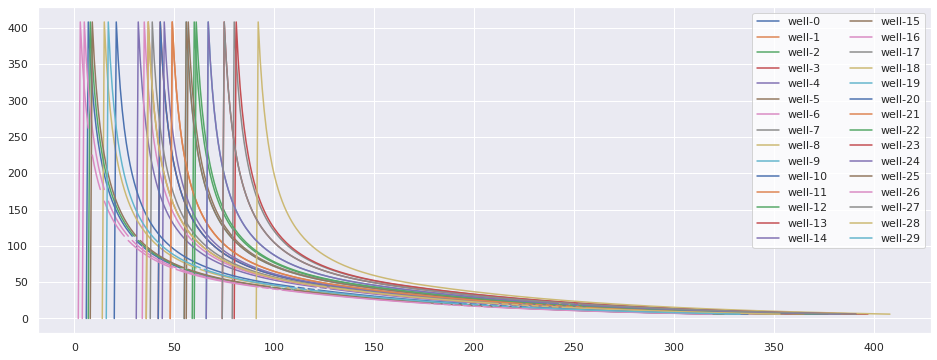

In [26]:
plt.figure(figsize=(16, 6))

ffd_df.plot(
    kind="line",
    ax=plt.gca(),
)
plt.gca().legend(ncol=2, facecolor="white")

plt.show()